In [1]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv
Saving weels_var2.csv to weels_var2.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
wheels_df = pd.read_csv('weels_var2.csv',encoding='cp1251',delimiter=';',decimal=',')
cars_df = pd.read_csv('cars.csv',encoding='cp1251',delimiter=';',decimal=',')

<ipython-input-3-ee65938cbf97>:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  wheels_df = pd.read_csv('weels_var2.csv',encoding='cp1251',delimiter=';',decimal=',')


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124310 entries, 0 to 124309
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID А/С                      124310 non-null  int64  
 1   модель А/С                  124310 non-null  object 
 2   ИД водителя                 123552 non-null  float64
 3   время начала                124310 non-null  object 
 4   время окончания             124310 non-null  object 
 5   Пробег за инт-л             124281 non-null  float64
 6   Вес за инт-л                124308 non-null  float64
 7   кол-во перегрузов 5-10%     48244 non-null   float64
 8   кол-во перегрузов 10-15%    48244 non-null   float64
 9   кол-во перегрузов >15%      48244 non-null   float64
 10  Кол-во превышений скорости  124310 non-null  int64  
 11  Карьер                      124310 non-null  object 
 12  Ср.скорость с грузом        121191 non-null  float64
 13  Ср. скорость б

In [5]:
cars_df.head()

,ID А/С,модель А/С,ИД водителя,время начала,время окончания,Пробег за инт-л,Вес за инт-л,кол-во перегрузов 5-10%,кол-во перегрузов 10-15%,кол-во перегрузов >15%,Кол-во превышений скорости,Карьер,Ср.скорость с грузом,Ср. скорость без груза,Пробег с грузом,Расход топлива,Температура,Осадки
0,51790,Б-75145,NaN,04.02.2012 12:00,04.02.2012 20:00,16.687,267.90,NaN,NaN,NaN,0,15 лет Октября,5.94,8.42,NaN,NaN,-21.600000,NaN
1,51790,Б-75145,NaN,04.02.2012 20:00,05.02.2012 4:00,21.612,535.80,NaN,NaN,NaN,0,15 лет Октября,4.52,0.00,NaN,NaN,0.833725,Ливень (ливни).
2,51790,Б-75145,NaN,05.02.2012 4:00,05.02.2012 12:00,6.694,188.00,NaN,NaN,NaN,0,15 лет Октября,2.27,0.00,2.330,NaN,-24.300000,Ливень (ливни).
3,51790,Б-75145,NaN,05.02.2012 12:00,05.02.2012 20:00,58.208,2226.23,NaN,NaN,NaN,0,15 лет Октября,29.02,29.60,29.104,NaN,-24.500000,Снег и/или другие виды твердых осадков
4,51790,Б-75145,NaN,05.02.2012 20:00,06.02.2012 4:00,52.544,1101.80,NaN,NaN,NaN,0,15 лет Октября,25.48,21.39,23.670,NaN,0.285039,Ливень (ливни).


In [6]:
wheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162824 entries, 0 to 162823
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   162824 non-null  int64  
 1   ?ИД шины                     162824 non-null  int64  
 2   модель шины                  162824 non-null  object 
 3   ID А/С                       162824 non-null  int64  
 4   модель А/С                   162824 non-null  object 
 5   ИД водителя                  162244 non-null  float64
 6   время начала                 162824 non-null  object 
 7   время окончания              162824 non-null  object 
 8   Пробег за инт-л              162788 non-null  float64
 9   Вес за инт-л                 162824 non-null  float64
 10  Причина снятия (примечание)  204 non-null     object 
 11  кол-во перегрузов 5-10%      58328 non-null   float64
 12  кол-во перегрузов 10-15%     58328 non-null   float64
 13 

In [8]:
wheels_df.head()

,Unnamed: 0,?ИД шины,модель шины,ID А/С,модель А/С,ИД водителя,время начала,время окончания,Пробег за инт-л,Вес за инт-л,...,Ср.скорость с грузом,Ср. скорость без груза,Пробег с грузом,Минимальное давление,Максемальное давление,Среденее давление,СКО давления,Аварии,Температура,Осадки
0,32,154790,Michelin,51790,Б-75145,NaN,21.02.2012 20:00,22.02.2012 4:00,53.259,844.04,...,24.85,27.89,20.814,NaN,NaN,NaN,NaN,NaN,1.191600,Ливень (ливни).
1,37,154790,Michelin,51790,Б-75145,NaN,26.02.2012 4:00,26.02.2012 12:00,50.881,1150.89,...,22.43,40.82,17.641,NaN,NaN,NaN,NaN,NaN,-15.200000,Снег и/или другие виды твердых осадков
2,38,154790,Michelin,51790,Б-75145,NaN,26.02.2012 12:00,26.02.2012 20:00,65.136,2153.12,...,27.21,28.07,32.044,NaN,NaN,NaN,NaN,NaN,-8.400000,Снег и/или другие виды твердых осадков
3,39,154790,Michelin,51790,Б-75145,NaN,26.02.2012 20:00,27.02.2012 4:00,56.751,1747.00,...,30.31,23.87,27.300,NaN,NaN,NaN,NaN,NaN,1.342629,NaN
4,60,154790,Michelin,51790,Б-75145,NaN,08.03.2012 12:00,08.03.2012 20:00,85.328,231.00,...,20.08,23.72,12.240,NaN,NaN,NaN,NaN,NaN,-6.700000,Метель


In [7]:
merged_df = pd.merge(cars_df, wheels_df, how='outer', on=['ID А/С', 'время начала', 'время окончания'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259424 entries, 0 to 259423
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID А/С                        259424 non-null  int64  
 1   модель А/С_x                  259424 non-null  object 
 2   ИД водителя_x                 258209 non-null  float64
 3   время начала                  259424 non-null  object 
 4   время окончания               259424 non-null  object 
 5   Пробег за инт-л_x             259365 non-null  float64
 6   Вес за инт-л_x                259422 non-null  float64
 7   кол-во перегрузов 5-10%_x     96734 non-null   float64
 8   кол-во перегрузов 10-15%_x    96734 non-null   float64
 9   кол-во перегрузов >15%_x      96734 non-null   float64
 10  Кол-во превышений скорости_x  259424 non-null  int64  
 11  Карьер_x                      259424 non-null  object 
 12  Ср.скорость с грузом_x        251010 non-nul

In [9]:
merged_df = merged_df.drop(columns=['Unnamed: 0','Минимальное давление','Максемальное давление',
                          'Среденее давление','СКО давления','Аварии','Температура_y','Осадки_y'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259424 entries, 0 to 259423
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID А/С                        259424 non-null  int64  
 1   модель А/С_x                  259424 non-null  object 
 2   ИД водителя_x                 258209 non-null  float64
 3   время начала                  259424 non-null  object 
 4   время окончания               259424 non-null  object 
 5   Пробег за инт-л_x             259365 non-null  float64
 6   Вес за инт-л_x                259422 non-null  float64
 7   кол-во перегрузов 5-10%_x     96734 non-null   float64
 8   кол-во перегрузов 10-15%_x    96734 non-null   float64
 9   кол-во перегрузов >15%_x      96734 non-null   float64
 10  Кол-во превышений скорости_x  259424 non-null  int64  
 11  Карьер_x                      259424 non-null  object 
 12  Ср.скорость с грузом_x        251010 non-nul

In [10]:
for col in merged_df.select_dtypes(include=['float64','int64']):
    if merged_df[col].isnull().sum() > 0:
        merged_df[col].fillna(merged_df[col].mean(), inplace=True)
    mean = merged_df[col].mean()
    std = merged_df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    merged_df = merged_df[(merged_df[col] >= lower_bound) & (merged_df[col] <= upper_bound)]


<ipython-input-10-1b3cd78462d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[col].fillna(merged_df[col].mean(), inplace=True)


In [11]:
for col in merged_df.select_dtypes(include=['object']):
    merged_df[col].fillna('Unknown', inplace=True)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 192392 entries, 3 to 259423
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID А/С                        192392 non-null  int64  
 1   модель А/С_x                  192392 non-null  object 
 2   ИД водителя_x                 192392 non-null  float64
 3   время начала                  192392 non-null  object 
 4   время окончания               192392 non-null  object 
 5   Пробег за инт-л_x             192392 non-null  float64
 6   Вес за инт-л_x                192392 non-null  float64
 7   кол-во перегрузов 5-10%_x     192392 non-null  float64
 8   кол-во перегрузов 10-15%_x    192392 non-null  float64
 9   кол-во перегрузов >15%_x      192392 non-null  float64
 10  Кол-во превышений скорости_x  192392 non-null  int64  
 11  Карьер_x                      192392 non-null  object 
 12  Ср.скорость с грузом_x        192392 non-nul

In [12]:
corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-12-37cc5a69c14f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


,ID А/С,ИД водителя_x,Пробег за инт-л_x,Вес за инт-л_x,кол-во перегрузов 5-10%_x,кол-во перегрузов 10-15%_x,кол-во перегрузов >15%_x,Кол-во превышений скорости_x,Ср.скорость с грузом_x,Ср. скорость без груза_x,Пробег с грузом_x,Расход топлива,Температура_x,?ИД шины,ИД водителя_y,Пробег за инт-л_y,Вес за инт-л_y,кол-во перегрузов 5-10%_y,кол-во перегрузов 10-15%_y,кол-во перегрузов >15%_y,Кол-во превышений скорости_y,Ср.скорость с грузом_y,Ср. скорость без груза_y,Пробег с грузом_y
ID А/С,1.000000,0.047789,-0.133631,-0.101137,-0.033439,-0.052937,-0.078619,0.075308,-0.252485,-0.010183,-0.150473,-0.037294,0.023237,-0.086687,0.023978,-0.022166,-0.083179,-0.016304,-0.005443,-0.005443,0.051671,-0.139314,0.011601,-0.019232
ИД водителя_x,0.047789,1.000000,-0.005944,-0.016994,0.018342,0.026918,0.019253,0.059481,0.018709,-0.020826,-0.018169,-0.011361,-0.031467,-0.037413,0.735886,0.010384,0.012192,0.016286,0.056944,0.056944,0.040179,0.018358,-0.031180,0.005560
Пробег за инт-л_x,-0.133631,-0.005944,1.000000,0.242398,-0.051731,-0.062257,-0.022027,0.335289,0.370177,0.503036,0.904720,0.498669,0.050848,-0.089066,-0.011752,0.646045,0.300986,-0.103674,-0.220535,-0.220535,0.233698,0.192985,0.244753,0.584698
Вес за инт-л_x,-0.101137,-0.016994,0.242398,1.000000,0.177432,0.097195,0.034747,0.001670,0.076774,-0.105654,0.269055,0.033316,0.044755,-0.001550,0.016326,0.289077,0.618157,0.092851,0.109867,0.109867,-0.059307,0.201995,0.016580,0.298469
кол-во перегрузов 5-10%_x,-0.033439,0.018342,-0.051731,0.177432,1.000000,0.520930,0.343117,-0.154552,0.026783,-0.098666,-0.042842,-0.099967,0.027518,0.119665,0.028946,-0.041616,0.082688,0.600659,0.513369,0.513369,-0.193942,0.103801,-0.088234,-0.040506
кол-во перегрузов 10-15%_x,-0.052937,0.026918,-0.062257,0.097195,0.520930,1.000000,0.463922,-0.229276,0.070093,-0.123712,-0.067178,-0.120572,0.009319,0.138642,0.039681,-0.051548,0.064429,0.290997,0.565965,0.565965,-0.225582,0.115581,-0.106287,-0.051993
кол-во перегрузов >15%_x,-0.078619,0.019253,-0.022027,0.034747,0.343117,0.463922,1.000000,-0.255013,0.115360,-0.109651,-0.041436,-0.092228,0.000855,0.125840,0.031043,-0.038945,0.058005,0.241154,0.469024,0.469024,-0.198873,0.103483,-0.092725,-0.041670
Кол-во превышений скорости_x,0.075308,0.059481,0.335289,0.001670,-0.154552,-0.229276,-0.255013,1.000000,0.156594,0.318736,0.314004,0.189629,0.068797,-0.340292,0.039901,0.294182,-0.072314,-0.147301,-0.299314,-0.299314,0.765323,0.085800,0.229064,0.266862
Ср.скорость с грузом_x,-0.252485,0.018709,0.370177,0.076774,0.026783,0.070093,0.115360,0.156594,1.000000,0.340720,0.321130,0.090543,0.026437,0.039445,0.002532,0.209625,0.207078,0.010272,0.013544,0.013544,0.069237,0.617452,0.204051,0.193246
Ср. скорость без груза_x,-0.010183,-0.020826,0.503036,-0.105654,-0.098666,-0.123712,-0.109651,0.318736,0.340720,1.000000,0.485033,0.340674,0.031409,-0.072674,-0.041091,0.267869,0.023528,-0.109533,-0.226152,-0.226152,0.185168,0.207602,0.620604,0.245178


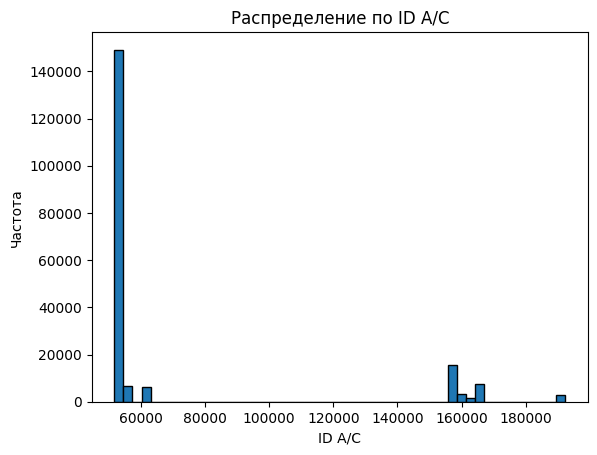

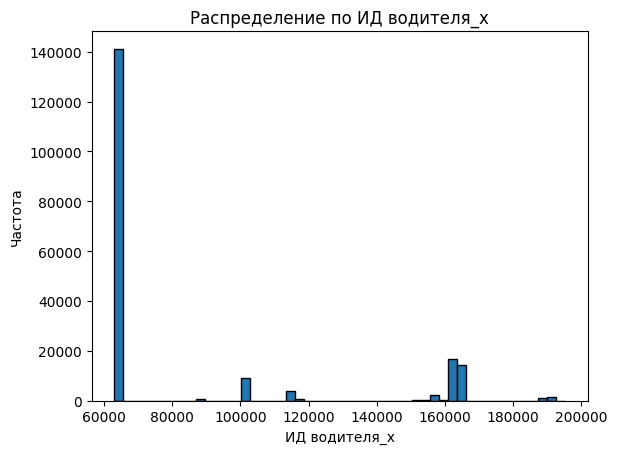

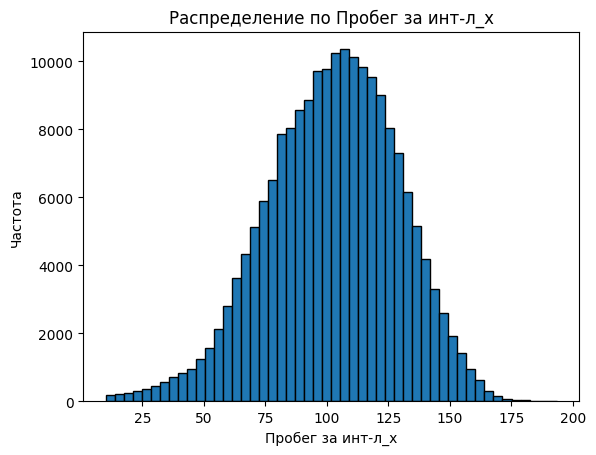

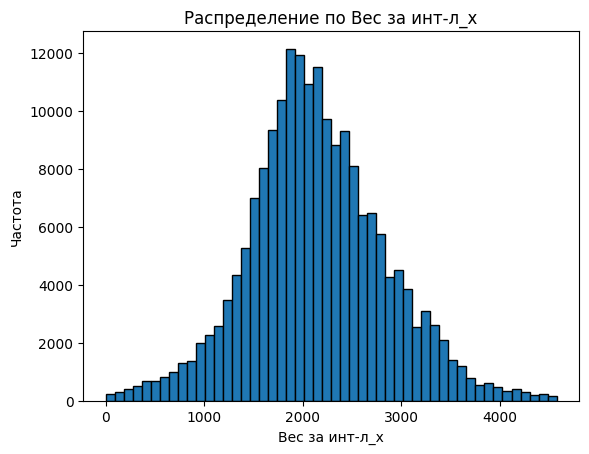

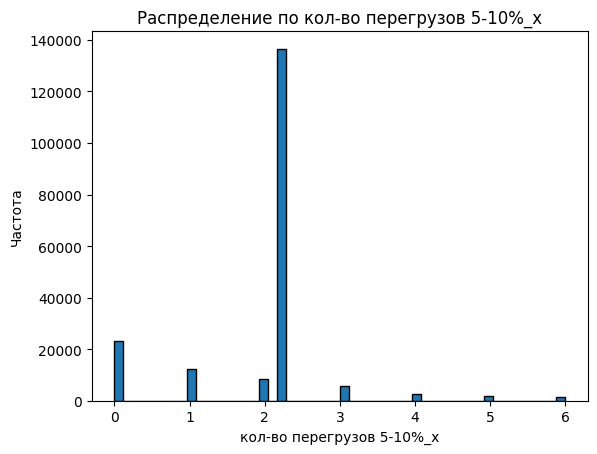

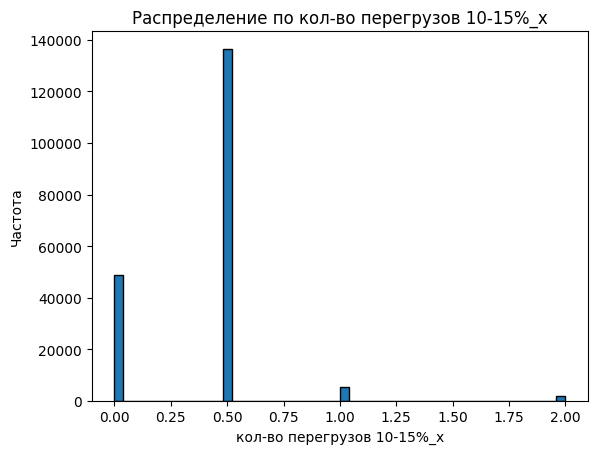

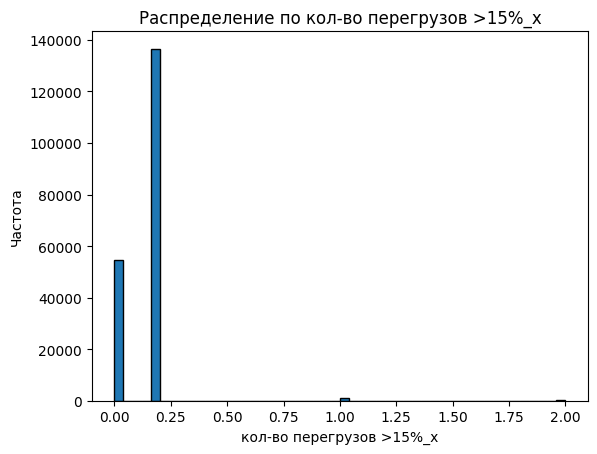

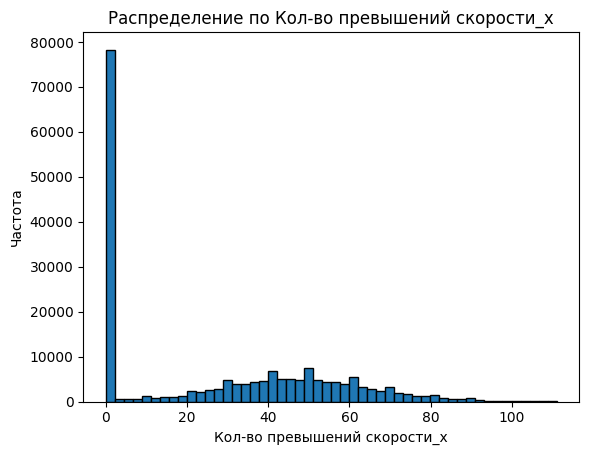

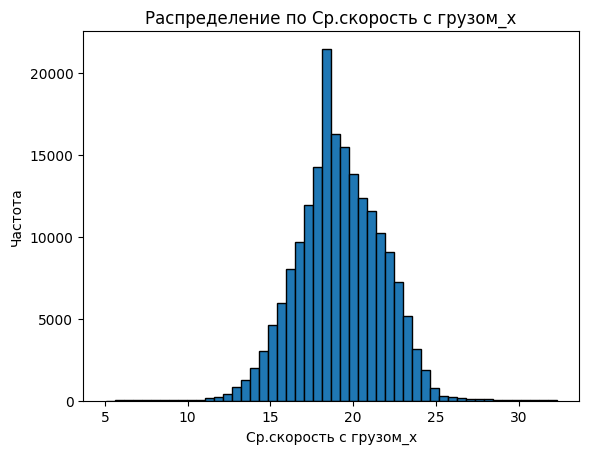

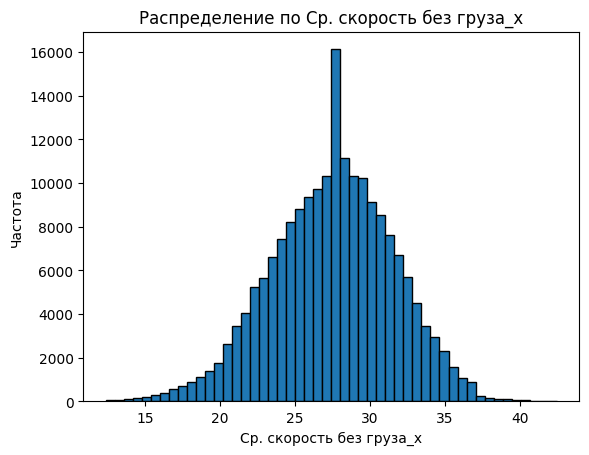

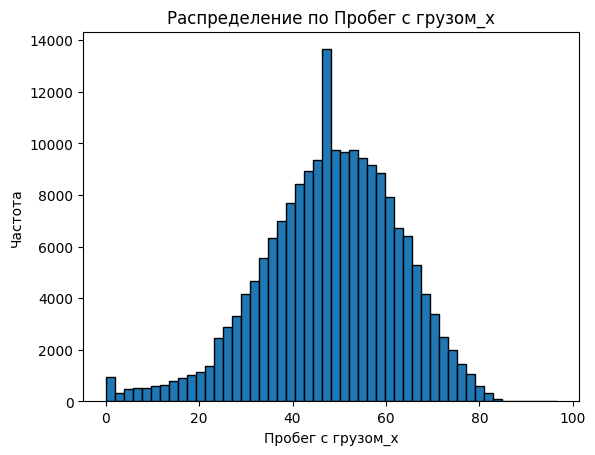

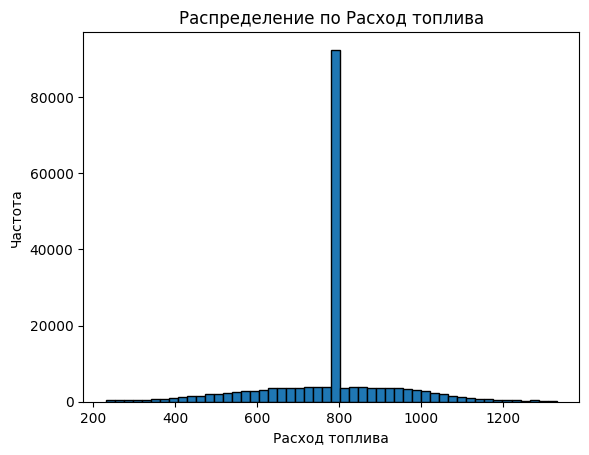

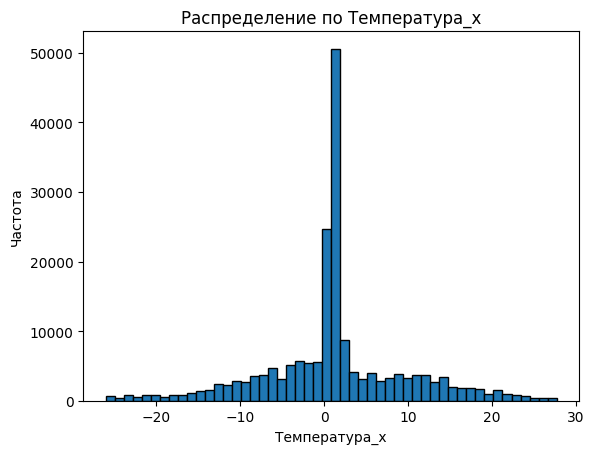

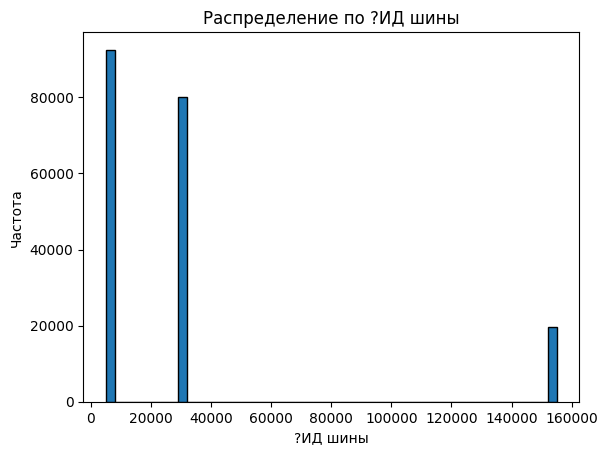

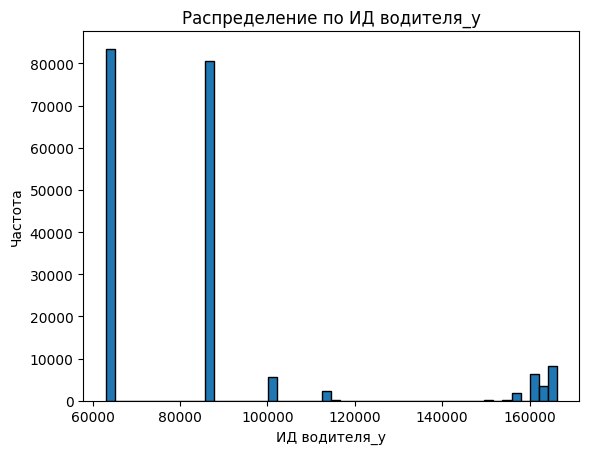

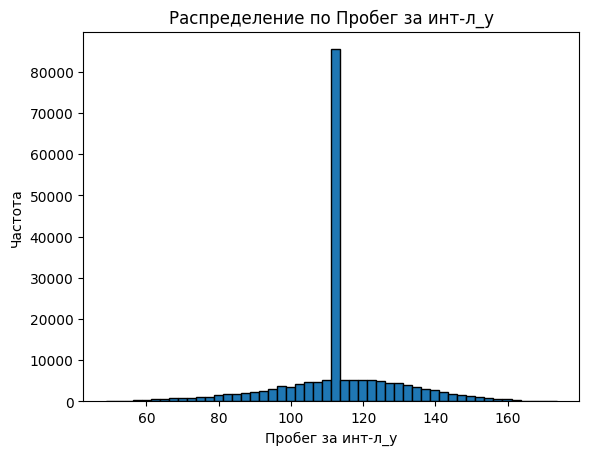

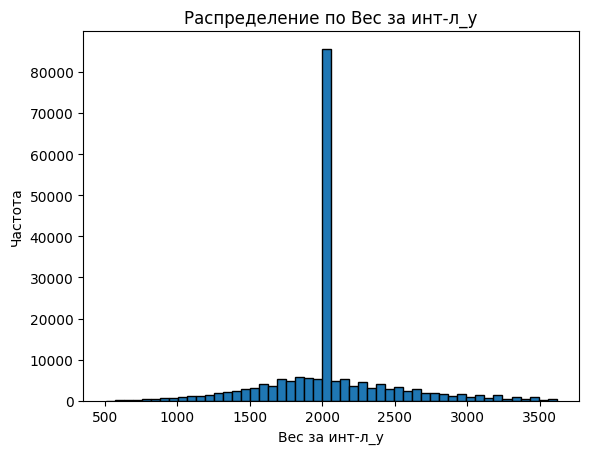

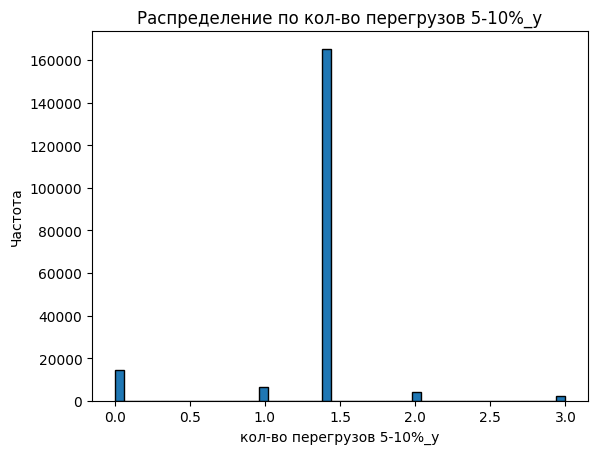

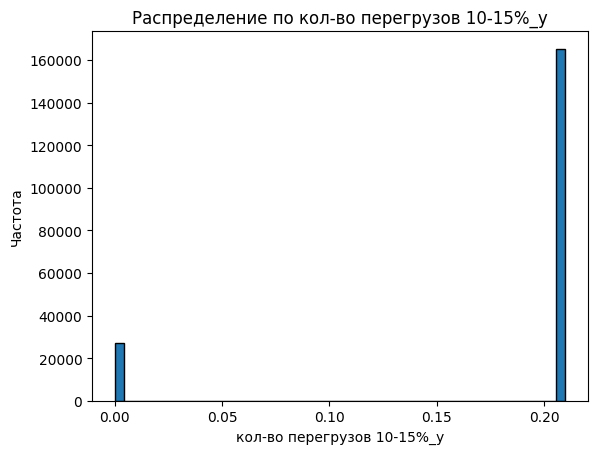

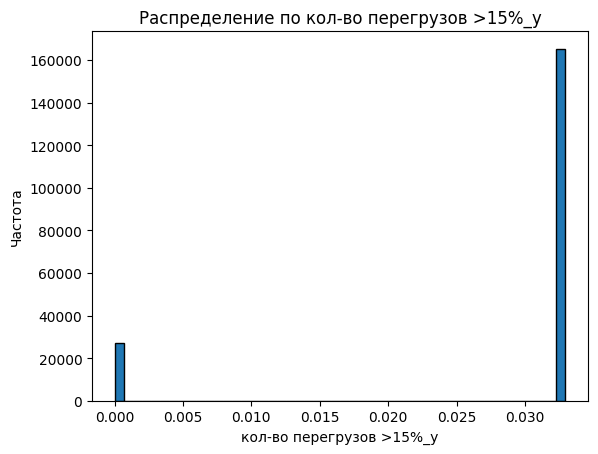

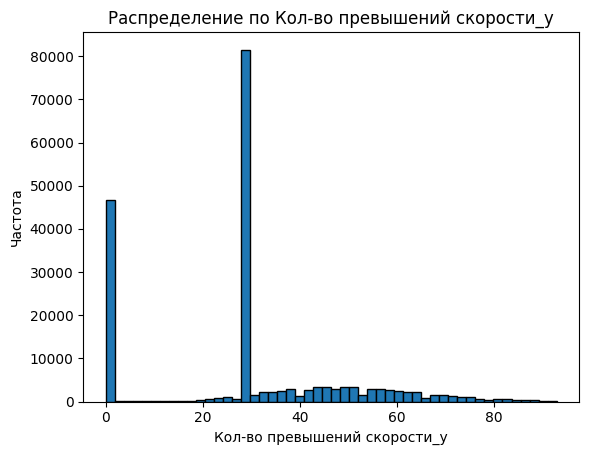

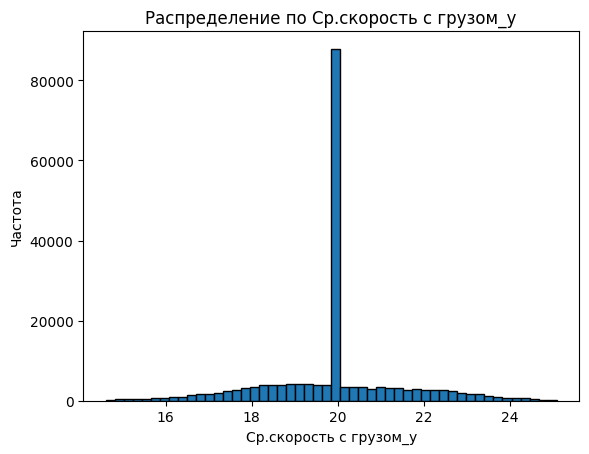

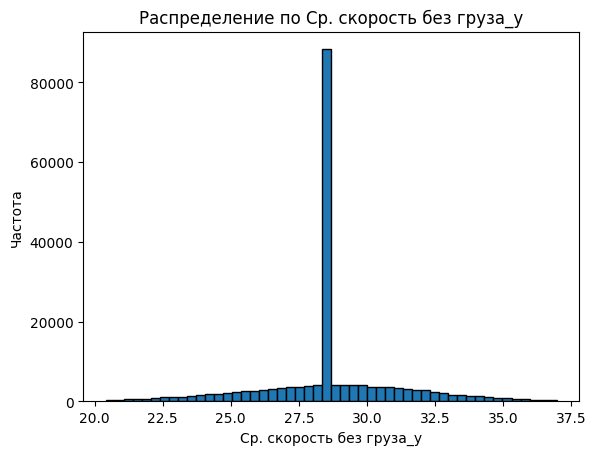

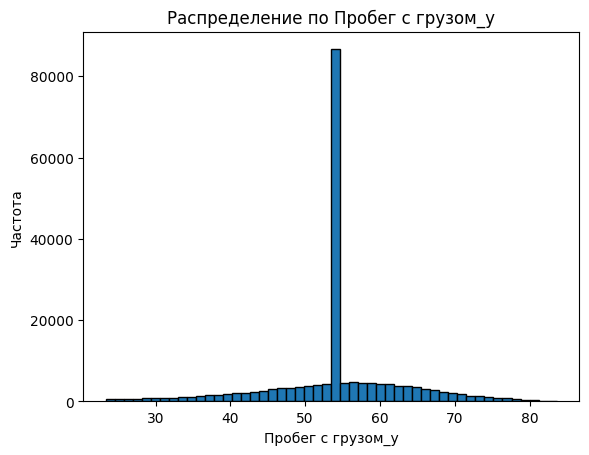

In [13]:
for column in merged_df.select_dtypes(include=['float64', 'int64']):
    fig, ax = plt.subplots()
    ax.hist(merged_df[column], bins=50, edgecolor='black')
    ax.set_title(f'Распределение по {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    plt.show()

In [14]:
for column in merged_df.select_dtypes(include=['float64', 'int64']):
    print('Unique count: ', len(merged_df[column].unique()))
    print('Mean, std etc: ')
    print('Column: ', column)
    print(merged_df['Пробег за инт-л_x'].describe())
    print()

Unique count:  47
Mean, std etc: 
Column:  ID А/С
count    192392.000000
mean        102.327891
std          26.716635
min          10.080000
25%          84.431250
50%         103.589000
75%         121.357000
max         193.360000
Name: Пробег за инт-л_x, dtype: float64

Unique count:  220
Mean, std etc: 
Column:  ИД водителя_x
count    192392.000000
mean        102.327891
std          26.716635
min          10.080000
25%          84.431250
50%         103.589000
75%         121.357000
max         193.360000
Name: Пробег за инт-л_x, dtype: float64

Unique count:  56549
Mean, std etc: 
Column:  Пробег за инт-л_x
count    192392.000000
mean        102.327891
std          26.716635
min          10.080000
25%          84.431250
50%         103.589000
75%         121.357000
max         193.360000
Name: Пробег за инт-л_x, dtype: float64

Unique count:  59618
Mean, std etc: 
Column:  Вес за инт-л_x
count    192392.000000
mean        102.327891
std          26.716635
min          10.080000


In [15]:
merged_df.groupby("Позиция")["?ИД шины"].nunique()

Позиция
Unknown      1
ЛЗВ        150
ЛЗН        155
ЛП         154
ПЗВ        150
ПЗН        160
ПП         150
Name: ?ИД шины, dtype: int64

In [16]:
merged_df.groupby("ID А/С")["ИД водителя_x"].nunique()

ID А/С
51764      55
51765      89
51766      46
51767      41
51768      16
51769      35
51770      58
51771      72
51772      50
51773      84
51774      94
51775     148
51776     117
51784      95
51785      36
51787     111
51790      39
51791     114
51792      97
51795     123
51796     121
51797     131
51798     126
51844     115
51886      77
51888      86
51889      81
51890     126
51891     121
51892     121
51908      69
51910     100
57368      91
57369      97
62888      61
155908     93
156448     75
156688    100
156948     95
158548     90
159770     28
159771     27
162688     58
164648    113
165493     91
192255     47
192370     41
Name: ИД водителя_x, dtype: int64

In [45]:
features = ['модель А/С_x', 'Пробег за инт-л_x', 'кол-во перегрузов 5-10%_x', 'кол-во перегрузов 10-15%_x',
            'кол-во перегрузов >15%_x', 'Кол-во превышений скорости_x', 'Карьер_y', 'Ср.скорость с грузом_y',
            'Ср. скорость без груза_y', 'Пробег с грузом_y']


In [46]:
target = 'Вес за инт-л_x'

In [47]:
for feature in ['модель А/С_x', 'Карьер_y']:
    merged_df[feature] = le.fit_transform(merged_df[feature])


In [48]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)


In [49]:
# Обучение модели линейной регрессии
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [50]:
# Оценка модели
linear_regression_predictions = linear_regression_model.predict(X_test)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
print(f"Mean Squared Error (Linear Regression): {linear_regression_mse}")


Mean Squared Error (Linear Regression): 385782.42301074904


In [51]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
print(f"Mean Squared Error (Random Forest): {random_forest_mse}")

Mean Squared Error (Random Forest): 219771.69736397135


In [57]:
# Отбор наиболее важных признаков
feature_importance = random_forest_model.feature_importances_
important_features = pd.Series(feature_importance, index=features).sort_values(ascending=False)
print("Important Features:")
print(important_features)

Important Features:
Пробег за инт-л_x               0.408839
Пробег с грузом_y               0.159516
модель А/С_x                    0.144997
Кол-во превышений скорости_x    0.101847
Ср.скорость с грузом_y          0.083182
Ср. скорость без груза_y        0.052331
кол-во перегрузов 5-10%_x       0.026289
кол-во перегрузов 10-15%_x      0.009622
Карьер_y                        0.007507
кол-во перегрузов >15%_x        0.005871
dtype: float64


In [59]:
# Отбор признаков и целевой переменной
features = ['модель шины', 'Пробег за инт-л_x', 'Вес за инт-л_x', 'кол-во перегрузов 5-10%_x', 'кол-во перегрузов 10-15%_x',
            'кол-во перегрузов >15%_x', 'Кол-во превышений скорости_x', 'Карьер_y', 'Позиция', 'Ср.скорость с грузом_y',
            'Ср. скорость без груза_y', 'Пробег с грузом_y']

target = 'Причина снятия (примечание)'


In [60]:
# Обработка категориальных признаков
for feature in ['модель шины', 'Карьер_y', 'Позиция', 'Причина снятия (примечание)']:
    merged_df[feature] = le.fit_transform(merged_df[feature])


In [61]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)


In [62]:
# Обучение модели случайного леса
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

In [63]:
# Оценка модели
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
print(f"Mean Squared Error (Random Forest): {random_forest_mse}")

Mean Squared Error (Random Forest): 0.0044923568699810285


In [72]:
feature_importance = random_forest_model.feature_importances_
important_features = pd.Series(feature_importance, index=features).sort_values(ascending=False)
print("Important Features:")
print(important_features)

Important Features:
Позиция                         0.355957
Вес за инт-л_x                  0.139577
Пробег с грузом_y               0.112186
Пробег за инт-л_x               0.106294
модель шины                     0.092054
Ср. скорость без груза_y        0.089787
Ср.скорость с грузом_y          0.057711
Кол-во превышений скорости_x    0.035330
кол-во перегрузов 5-10%_x       0.006107
кол-во перегрузов >15%_x        0.002892
кол-во перегрузов 10-15%_x      0.001749
Карьер_y                        0.000357
dtype: float64


In [73]:
cluster_features = ['Пробег за инт-л_x', 'Вес за инт-л_x', 'кол-во перегрузов 5-10%_x', 'кол-во перегрузов 10-15%_x',
                    'кол-во перегрузов >15%_x', 'Кол-во превышений скорости_x', 'Ср.скорость с грузом_y',
                    'Ср. скорость без груза_y', 'Пробег с грузом_y']


In [74]:
# Кластерный анализ с помощью алгоритма K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(merged_df[cluster_features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
# Добавление меток кластеров в исходные данные
merged_df['Cluster'] = clusters

In [76]:
# Вывод результатов кластерного анализа
print("Cluster Analysis Results:")
print(merged_df[['ID А/С', 'Пробег за инт-л_x', 'Вес за инт-л_x', 'Причина снятия (примечание)', 'Cluster']])


Cluster Analysis Results:
        ID А/С  Пробег за инт-л_x  Вес за инт-л_x  \
3        51790             58.208         2226.23   
4        51790             52.544         1101.80   
5        51790             65.028         1878.46   
6        51790             80.684         1827.98   
7        51790             59.918         1992.00   
...        ...                ...             ...   
259419  192370            135.180         2104.90   
259420  192370            135.180         2104.90   
259421  192370            135.180         2104.90   
259422  192370            135.180         2104.90   
259423  192370            135.180         2104.90   

        Причина снятия (примечание)  Cluster  
3                                 0        0  
4                                 0        2  
5                                 0        0  
6                                 0        0  
7                                 0        0  
...                             ...      ...  
259419  